In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import seaborn
import sympy as sm
sm.init_printing()

## Άσκηση 2
Κυλινδρική έλικα έχει εξίσωση: 
\begin{align}
\varpi &=R \\
\phi &= A \lambda t \\
z &= RA(1-e^{\phi/A}) 
\end{align}

όπου $R$ η κυλινδρική ακτίνα και $A$ σταθερά. Δαχτυλίδι είναι περασμένο και κινείται στην έλικα αυτή με τρόπο ώστε η αζιμουθιακή
γωνία αυξάνεται γραμμικά με το χρόνο με σταθερό $\lambda$.
* Βρείτε την ταχύτητα και την επιτάχυνση του δαχτυλιδιού σε κάθε χρόνο.
* Ποιά είναι η ακτίνα Καμπυλότητας
* Ποια η ακτίνα καμπυλότητας της έλικας;
* Αν η μάζα του δαχτυλιδιού είναι m πόση ενέργεια δίνει ή παίρνει συνολικά (από $t = 0$ ως πολύ μεγάλους χρόνους) αυτός που φροντίζει η κίνηση του δαχτυλιδιού να γίνεται με $\phi = A \lambda t$; (Αγνοήστε βάρος και τριβές.)

In [4]:
p,z,f,t=sm.symbols('\\varpi,z,\phi,t', real=True, positive=True)
R,A,l,m=sm.symbols('R,A,\lambda,m', real=True, positive=True)
p

In [7]:
p=R #(από εξίσωση 1)
f=A*l*t #(από εξίσωση 2)
z=R*A*(sm.Float(1)-sm.exp(-f/A)) #(από εξίσωση 3)

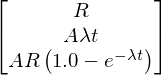

In [8]:
r=sm.Matrix([[p],[f],[z]])
r

### Ταχύτητα σε κυλνδρικές συντεταγμένες
$$
\vec{v}=\dot{p} \hat{p} +p\dot{\phi} \hat{\phi}+\dot{z}\hat{z}
$$

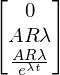

In [10]:
v=sm.Matrix([[sm.diff(p,t)],[p*sm.diff(f,t)],[sm.diff(z,t)]])
v

### Επιτάχυνση σε κυλνδρικές συντεταγμένες
$$
\vec{a}=(\ddot{p}-p\dot{\phi}^2)\hat{p} +(2\dot{p}\dot{\phi}+p\ddot{\phi}) \hat{\phi}+\ddot{z}\hat{z}
$$

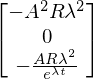

In [11]:
a=sm.Matrix([[sm.diff(p,t,2)-p*sm.diff(f,t)**2],[2*sm.diff(p,t)*sm.diff(f,t)+p*sm.diff(f,t,2)],[sm.diff(z,t,2)]])
a

### Τροχία σε καρτεσιανές συντεταγμένες

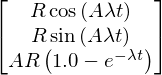

In [12]:
rk = sm.Matrix([[p*sm.cos(f)],[p*sm.sin(f)],[z]])
rk

In [13]:
sub={R:1.,A:5.,l:0.1}

In [14]:
xn= sm.lambdify(t,rk[0].subs(sub),"numpy")
yn = sm.lambdify(t,rk[1].subs(sub),"numpy")
zn = sm.lambdify(t,rk[2].subs(sub),"numpy")
tt=np.arange(0.,150.,0.2)

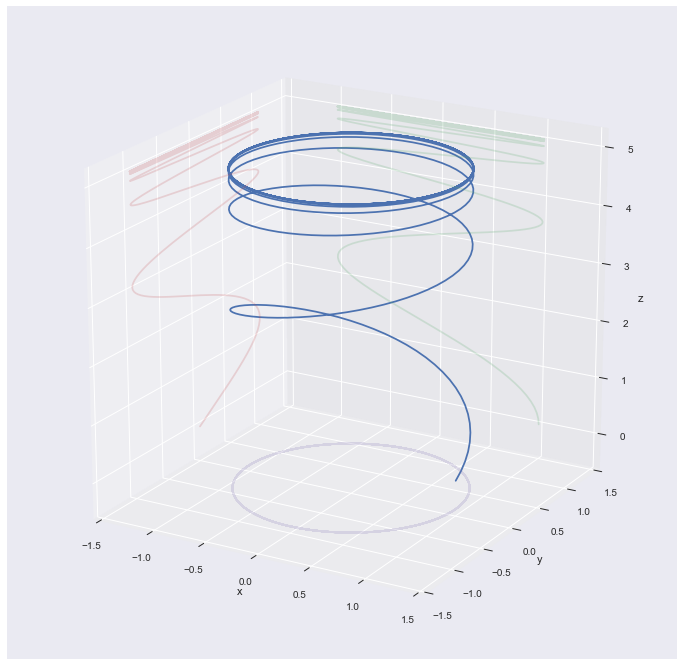

In [17]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.view_init(elev=20)#, azim=40)
ax.set_zlim([-0.5, 5.2])
ax.set_zlabel('z')
ax.set_ylim([-1.5, 1.5])
ax.set_ylabel('y')
ax.set_xlim([-1.5, 1.5])
ax.set_xlabel('x')
ax.plot(xn(tt),yn(tt),zn(tt))
ax.plot(xn(tt),zn(tt),  zdir='y', zs=1.5,alpha=0.2)
ax.plot(yn(tt),zn(tt),  zdir='x', zs=-1.5,alpha=0.2)
ax.plot(xn(tt),yn(tt),  zdir='z', zs=-0.5,alpha=0.2)

## Επιτρόχιος και κεντρομόλος επιτάχυνση
Η επιτρόχιος επιτάχυνση βρίσκεται από τη:
$$
\vec{a}_e = (\vec{a}\cdot \vec{e}) \vec{e}
$$
με το επιτρόχιο διάνυσμα $\vec{e} =\frac{\vec{V}}{|V|}$

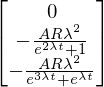

In [18]:
e=v/v.norm()
a_e=a.dot(e)*e
sm.simplify(a_e)

ενώ η κεντρομόλος επιτάχυνση βρίσκεται από τη:
$$
\vec{a}_k = (\vec{a}\cdot \vec{n}) \vec{n}
$$
με το κάθετο διάνυσμα $\vec{n} =\frac{\vec{a}}{|a|}$

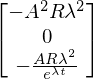

In [19]:
n=a/a.norm()
a_k=a.dot(n)*n
sm.simplify(a_k)

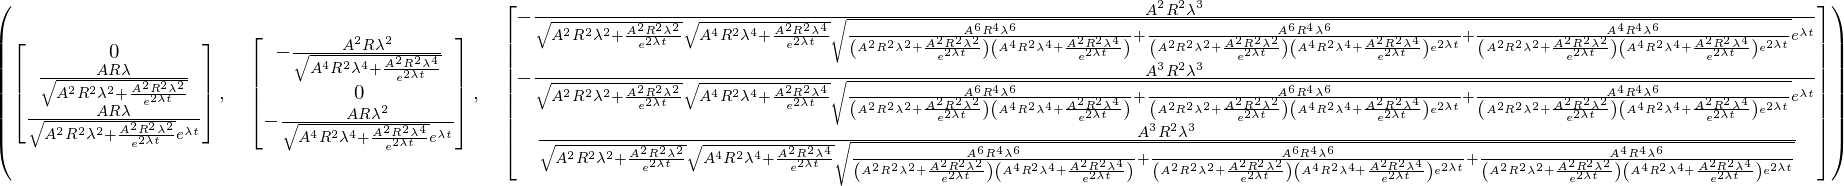

In [20]:
b=e.cross(n)
b=b/b.norm()
e,n,b

## Ακτίνα Καμπυλότητας
Η ακτίνα καμπυλότητας δίνεται από τη σχέση:
$$
R=k^{-1}=\frac{|\vec{v}^3|}{|\vec{v}\times\vec{a}|} 
$$

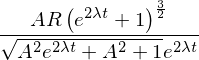

In [21]:
s=v.cross(a)
RR=v.norm()**3/s.norm()
sm.simplify(RR)

## Ενέργεια
Το έργο της δύναμης είναι:
$$
E=\int _0 ^\infty m \vec{a}\cdot{d\vec{r}} = \int _0 ^\infty m \vec{a}\cdot\vec{v} dt
$$

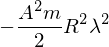

In [22]:
sm.integrate(m*a.dot(v),(t,0,sm.oo))

# Επίλυση του προβλήματος των 3 σωμάτων
Θεωρούμε το σύστημα Ήλιος - Γη - Διας, Η χαμιλτονιανή του συστήματος είναι η:
$$
\mathcal{H}=\frac{P_0 ^2}{2M}+\frac{P_1 ^2}{2m_1}+
\frac{P_2^2}{2m_2}-\frac{GMm_1}{|\vec{R}_1-\vec{R}_0}-\frac{GMm_2}{|\vec{R}_2-\vec{R}_0|}-
\frac{Gm_1m_2}{|\vec{R}_2-\vec{R}_1|}
$$
ή σε ηλιοκεντρικές συντεταγμένες $\vec{r}_1 = \vec{R}_1-\vec{R}_0$,  $\vec{r}_2 = \vec{R}_2-\vec{R}_0$

$$
\mathcal{H}=\frac{(P_0+P_1+P_2) ^2}{2M}+\frac{P_1 ^2}{2m_1}+
\frac{P_2^2}{2m_2}-\frac{GMm_1}{|\vec{r}_1}-\frac{GMm_2}{|\vec{r}_2|}-
\frac{Gm_1m_2}{|\vec{\Delta}|}
$$
με $\vec{\Delta}=\vec{R}_2-\vec{R}_1$ τη σχετική θέση των δύο πλανητών.

Αν θεωρήσουμε ότι $P_0=0$ και αναπτύξουμε το πρώτο όρο βρίσκουμε:
$$
\mathcal{H}=\frac{P_1 ^2}{2\mu_1}-\frac{G(M+m_1)\mu_1}{|\vec{r}_1|}
+\frac{P_2^2}{2\mu_2}-\frac{G(M+m_2)\mu_2}{|\vec{r}_2|}
-\frac{Gm_1m_2}{|\vec{\Delta}|}+\frac{\vec{P}_1 \cdot \vec{P}_2}{M}
$$
όπου $\mu _i =\frac{Mm_i}{M+m_i}$ η ανηγμένη μάζα του εκάστοτε σώματος.

### Ορισμός Συμβόλων

In [31]:
m1,m2,mu1,mu2,M=sm.symbols('m_j,m_\oplus,\mu_j,\mu_\oplus, M_\odot', real=True, positive=True)
x1,y1,x2,y2,p1x,p1y,p2x,p2y,p1,p2,r1,r2=sm.symbols('x_1,y_1,x_2,y_2,p_{1x},p_{1y},p_{2x},p_{2y},p_1,p_2,r_1,r_2',real=True, positive=True)
a1,a2,e1,e2=sm.symbols('a_1,a_2,e_1,e_2', real=True, positive=True)
x10,x20,y10,y20,p1x0,p1y0,p2x0,p2y0=sm.symbols('x_{10},x_{20},y_{10},y_{20},p_{1x0},p_{1y0},p_{2x0},p_{2y0}', real=True, positive=True)
W=sm.symbols('\Omega')
G,D=sm.symbols('G,\Delta', real=True, positive=True)
p1,p2,r1,r2,D=sm.symbols('p_1,p_2,r_1,r_2,\Delta')

### Hamiltonian

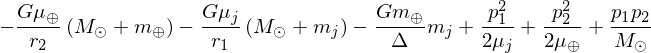

In [32]:
pp=p1*p2
H1=p1**2/(2*mu1)-G*(M+m1)*mu1/r1 
H2=p2**2/(2*mu2)-G*(M+m2)*mu2/r2
H3=-G*m1*m2/D + pp/M
H=H1+H2+H3
H

### Hamiltonian (σε καρτεσιανές συντεταγμένες)

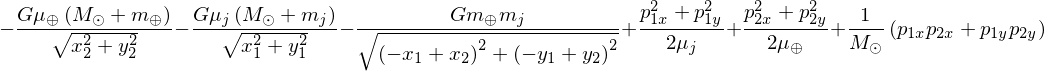

In [34]:
p1=sm.sqrt(p1x**2+p1y**2)
p2=sm.sqrt(p2x**2+p2y**2)
r1=sm.sqrt(x1**2+y1**2)
r2=sm.sqrt(x2**2+y2**2)
pp=p1x*p2x+p1y*p2y
D=sm.sqrt((y2-y1)**2+(x2-x1)**2)

H1=p1**2/(2*mu1)-G*(M+m1)*mu1/r1 
H2=p2**2/(2*mu2)-G*(M+m2)*mu2/r2
H3=-G*m1*m2/D + pp/M
H=H1+H2+H3
H

## Εξισώσεις κινησεις
\begin{align}
\dot{x}_1 &= \frac{\partial \mathcal{H}}{\partial P_{1x}} && 
\dot{y}_1 = \frac{\partial \mathcal{H}}{\partial P_{1x}} \\
\dot{x}_2 &= \frac{\partial \mathcal{H}}{\partial P_{2x}} && 
\dot{y}_2 = \frac{\partial \mathcal{H}}{\partial P_{2x}} \\
\dot{P}_{1x} &= -\frac{\partial \mathcal{H}}{\partial P_{1x}} &&
\dot{P}_{1y} = -\frac{\partial \mathcal{H}}{\partial P_{1y}}\\
\dot{P}_{2x} &= -\frac{\partial \mathcal{H}}{\partial P_{2x}} &&
\dot{P}_{2y} = -\frac{\partial \mathcal{H}}{\partial P_{2y}}
\end{align}

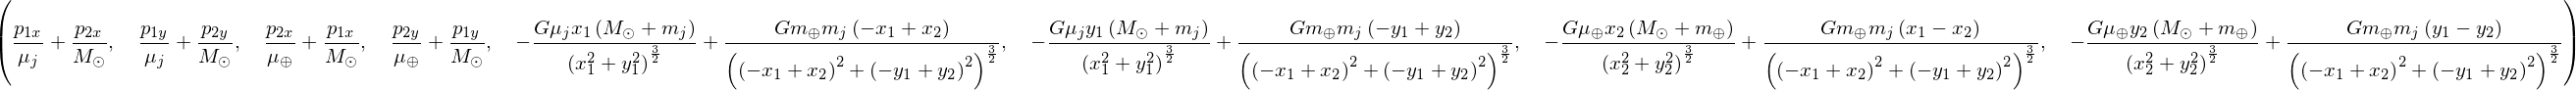

In [35]:
dotx1=H.diff(p1x)
doty1=H.diff(p1y)
dotx2=H.diff(p2x)
doty2=H.diff(p2y)

dotpx1=-H.diff(x1)
dotpy1=-H.diff(y1)

dotpx2=-H.diff(x2)
dotpy2=-H.diff(y2)
dotx1,doty1,dotx2,doty2,dotpx1,dotpy1,dotpx2,dotpy2

### Εισαγωγή αριθμητικών τιμών
* Μάζα Αστέρα: $1 M_\odot$
* Μάζα πρώτου πλανήτη: $0.0008 M_\odot$
* Μάζα δεύτερου πλανήτη: $0.0002 M_\odot$
* Ημιάξονας και εκκεντρότητα του πρώτου πλανήτη: $a_1=1.3 \mathtt{AU}, \, e_1 = 0.06$
* Ημιάξονας και εκκεντρότητα του δεύτερου πλανήτη: $a_1=2.9 \mathtt{AU}, \, e_1 = 0.02$

In [36]:
Gn=4.*np.pi**2
m1n=1./1047. #0.01
m2n=3.0e-6 #0.005
Mn=1.
a1n=5.20260
a2n=1.000001018
e1n=0.048498
e2n=0.0167086
apj=273.867
ape=114.207
Wn=(apj-ape)*np.pi/180.
mu1n=m1n*Mn/(Mn+m1n)
mu2n=m2n*Mn/(Mn+m2n)
sub={mu1:mu1n,mu2:mu2n,G:Gn,m1:m1n,m2:m2n,M:Mn,a1:a1n,a2:a2n,e1:e1n,e2:e2n,W:Wn}

## Αρχικές συνθήκες
$$
x_{10},y_{10},x_{20},y_{20},p_{x10},p_{y10},p_{x20},p_{y20}
$$

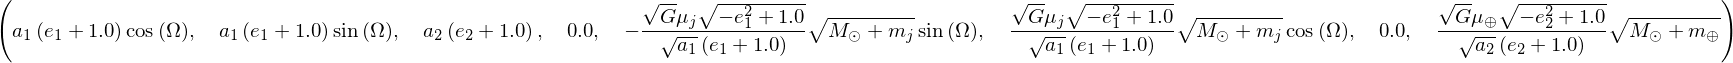

In [40]:
x10=a1*(1.+e1)*sm.cos(W)
y10=a1*(1.+e1)*sm.sin(W)
x20=a2*(1.+e2)
y20=sm.Float(0)

p1vec =mu1*sm.sqrt(G*(M+m1)*a1*(1.-e1**2))/(a1*(1.+e1))
p1x0=-p1vec*sm.sin(sm.pi-W)
p1y0=-p1vec*sm.cos(sm.pi-W)
p2x0=sm.Float(0)
p2y0=mu2*sm.sqrt(G*(M+m2)*a2*(1.-e2**2))/(a2*(1.+e2))

x10,y10,x20,y20,p1x0,p1y0,p2x0,p2y0

### Lambdification των εξισώσεων κίνησης
Μετατροπή των εξισώσεων κίνησης σε μορφή 
$$
\frac{d\mathbf{Y}}{dt}=\mathbf{F}(\mathbf{Y},t)=\mathbf{F}(\vec{r}_1,\vec{r}_2,\vec{p}_1,\vec{p}_2,t)
$$
για την αριθμητική ολοκλήρωση τους.

In [41]:
dx1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotx1.subs(sub),"numpy")
dx2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotx2.subs(sub),"numpy")
dy1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),doty1.subs(sub),"numpy")
dy2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),doty2.subs(sub),"numpy")
dpx1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpx1.subs(sub),"numpy")
dpx2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpx2.subs(sub),"numpy")
dpy1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpy1.subs(sub),"numpy")
dpy2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpy2.subs(sub),"numpy")
def dY(y,t):
    a= np.array([
            dx1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dx2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dy1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dy2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpx1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpx2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpy1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpy2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7])
        ])
    return a

### Αρχικές αριθμητικές συνθήκες

In [42]:
Y0=np.array([x10.subs(sub),
             x20.subs(sub),
             y10.subs(sub),
             y20.subs(sub),
             p1x0.subs(sub),
             p2x0.subs(sub),
             p1y0.subs(sub),
             p2y0.subs(sub)
            ]).astype('float')
Y0

array([ -5.11478261e+00,   1.01670964e+00,   1.89607598e+00,
         0.00000000e+00,  -8.70771912e-04,   0.00000000e+00,
        -2.34896126e-03,   1.85371568e-05])

In [44]:
from scipy.integrate import odeint

## Αριθμητική ολοκλήρωση
Αριθμητική ολοκλήρωση για 20000 χρόνια, με βήμα 3 ημερών

In [45]:
%%time 
t=np.arange(0.,20000.,3./365.)
sol=odeint(dY,Y0,t,rtol=1e-12,atol=1e-13,printmessg=True)
x1t,y1t=sol[:,0],sol[:,2]
x2t,y2t=sol[:,1],sol[:,3]
px1t,py1t=sol[:,4],sol[:,6]
px2t,py2t=sol[:,5],sol[:,7]

CPU times: user 22min 57s, sys: 9.76 s, total: 23min 7s
Wall time: 24min 25s


/usr/local/lib/python2.7/dist-packages/scipy/integrate/odepack.py:221: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


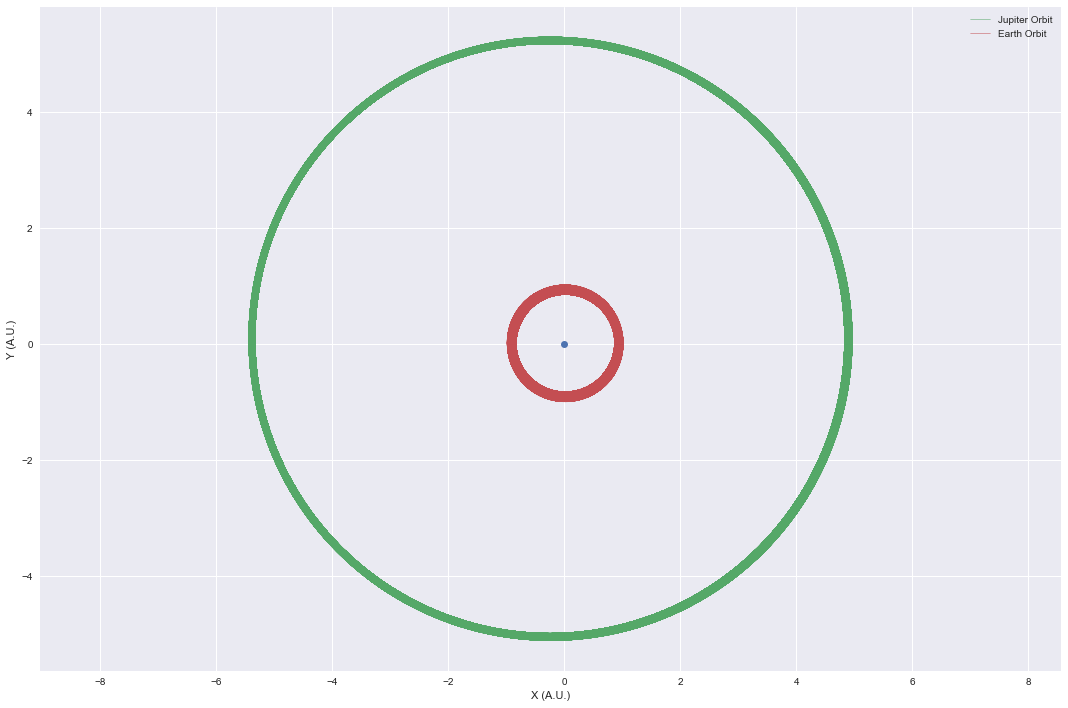

In [48]:
ten=100
lw=0.5
plt.figure(figsize=(15,10))
plt.plot([0],[0],'o')
plt.axis('equal')
plt.plot(x1t[::ten],y1t[::ten],linewidth=lw,label='Jupiter Orbit')
plt.plot(x2t[::ten],y2t[::ten],linewidth=lw,label='Earth Orbit')
plt.xlabel('X (A.U.)')
plt.ylabel('Y (A.U.)')
plt.tight_layout()
plt.legend(loc='best')

In [49]:
Energy=sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),H.subs(sub),"numpy")
Energy1=sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),H1.subs(sub),"numpy")
Energy2=sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),H2.subs(sub),"numpy")
Et=Energy(x1t,x2t,y1t,y2t,px1t,px2t,py1t,py2t)
E1t=Energy1(x1t,x2t,y1t,y2t,px1t,px2t,py1t,py2t)
E2t=Energy2(x1t,x2t,y1t,y2t,px1t,px2t,py1t,py2t)

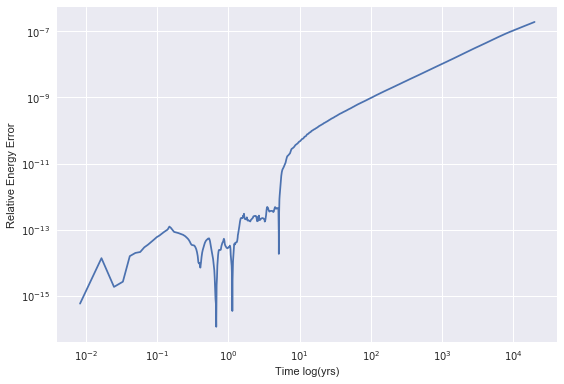

In [51]:
plt.loglog(t,np.abs(Et-Et[0])/np.abs(Et[0]))
plt.xlabel('Time log(yrs)')
plt.ylabel('Relative Energy Error')
plt.tight_layout()

In [52]:
a1t=-Gn*(Mn+m1n)*mu1n/(2.*E1t)
G1=x1t*py1t-y1t*px1t
e1t=np.sqrt(1.-G1**2/(mu1n**2 *Gn*(Mn+m1n)*a1t))

a2t=-Gn*(Mn+m2n)*mu2n/(2.*E2t)
G2=x2t*py2t-y2t*px2t
e2t=np.sqrt(1.-G2**2/(mu2n**2 *Gn*(Mn+m2n)*a2t))

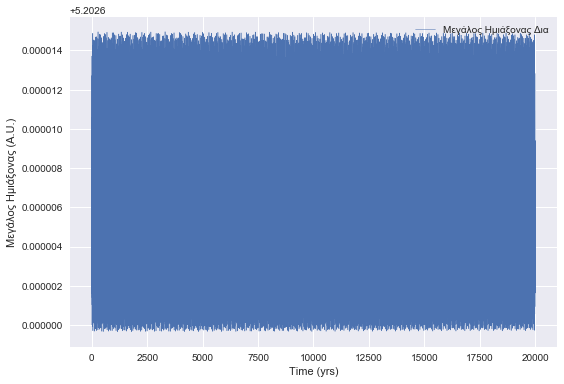

In [57]:
plt.plot(t[::ten],a1t[::ten],linewidth=lw,label=u'Μεγάλος Ημιάξονας Δια')
plt.xlabel('Time (yrs)')
plt.ylabel(u'Μεγάλος Ημιάξονας (A.U.)')
plt.legend(loc='best')
plt.tight_layout()

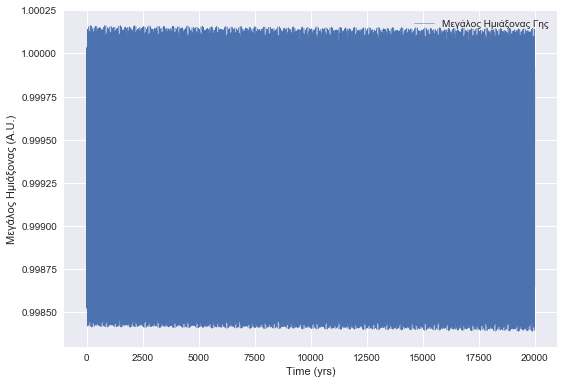

In [58]:
plt.plot(t[::ten],a2t[::ten],linewidth=0.5,label=u'Μεγάλος Ημιάξονας Γης')
plt.xlabel('Time (yrs)')
plt.ylabel(u'Μεγάλος Ημιάξονας (A.U.)')
plt.legend(loc='best')
plt.tight_layout()

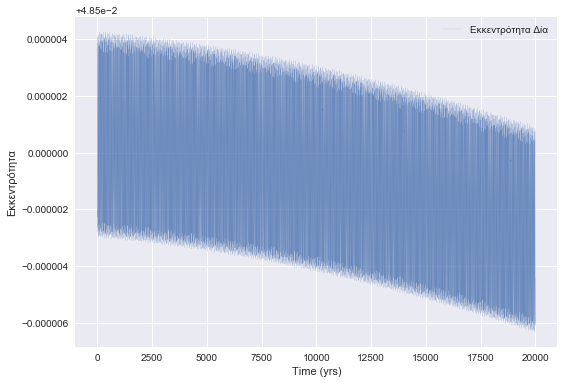

In [55]:
plt.plot(t[::ten],e1t[::ten],label=u'Εκκεντρότητα Δία',linewidth=0.1)
plt.xlabel('Time (yrs)')
plt.ylabel(u'Εκκεντρότητα')
plt.tight_layout()
plt.legend(loc='best')

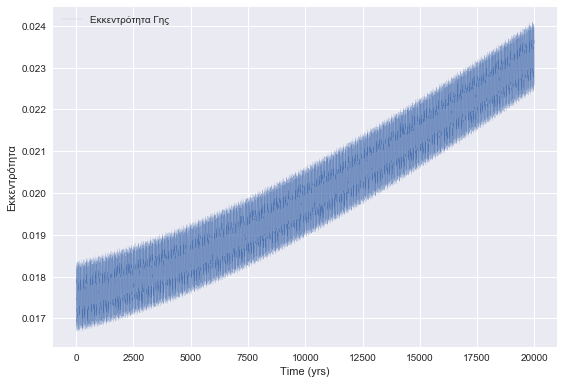

In [56]:
plt.plot(t[::ten],e2t[::ten],label=u'Εκκεντρότητα Γης',linewidth=0.1)
plt.xlabel('Time (yrs)')
plt.ylabel(u'Εκκεντρότητα')
plt.tight_layout()
plt.legend(loc='best')